In [1]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier  # Perbaikan penulisan
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

import pickle
from pathlib import Path

In [2]:
#import dataset
df_load = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv")

#Tampilkan bentuk dari dataset

#Tanpilkan 5 data teratas
print(df_load.head())

#Tanpilkan junlah I0 yang unik
print(df_load.customerID.nunique())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
# import matplotlib dan seaborn

import matplotlib.pyplot as plt
import seaborn as sns

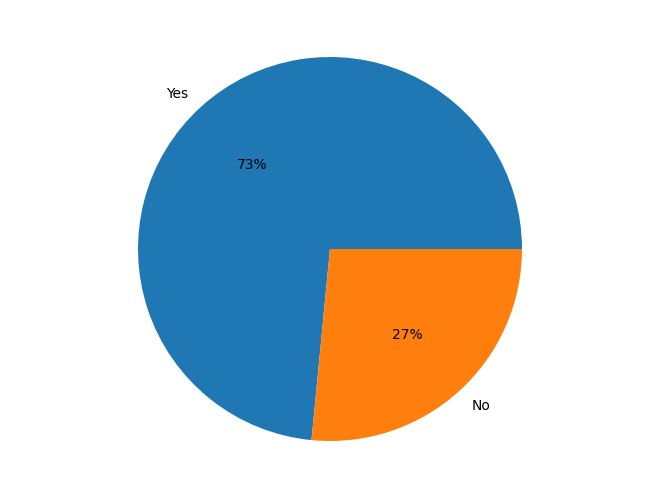

In [ ]:
# Memvisualisasikan Prosentase Churn

from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis("equal")
labels = ['Yes', 'No']
churn = df_load["Churn"].value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()


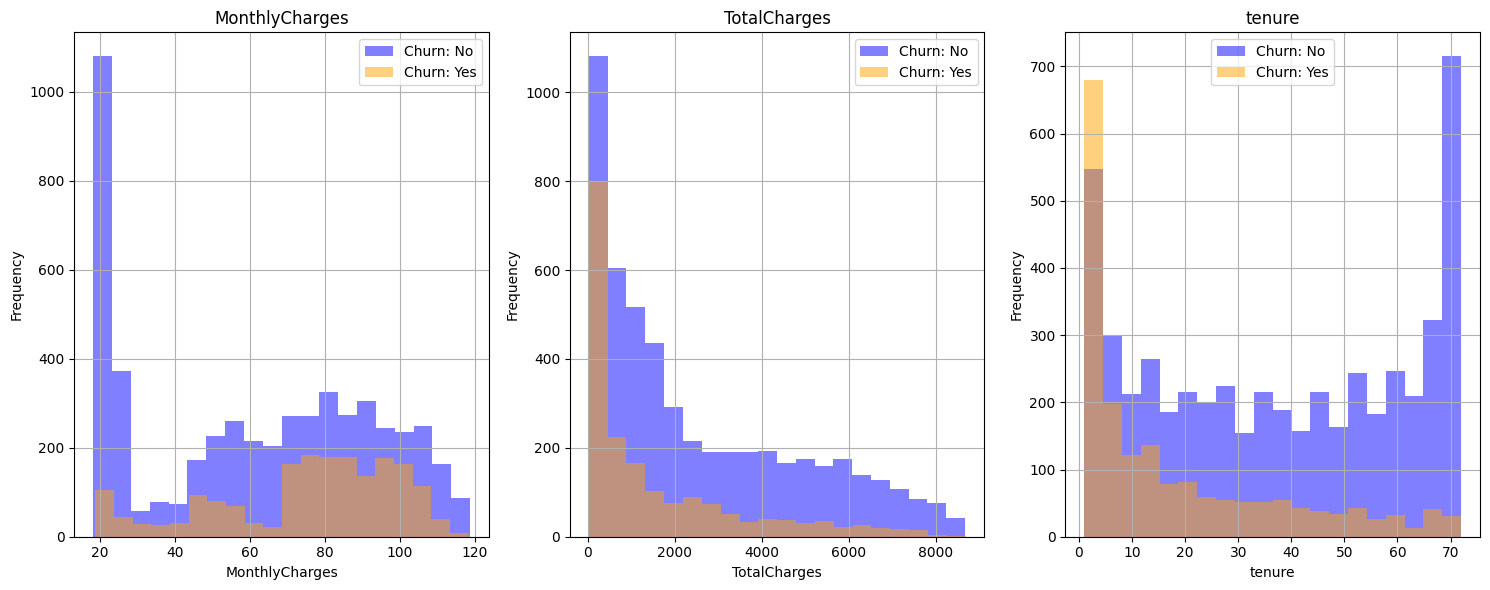

In [ ]:
# Exploraroty Data Analysis (EDA) Variabel Numerik

from matplotlib import pyplot as plt
import numpy as np

# Clean and convert 'TotalCharges' to numeric
df_load['TotalCharges'] = pd.to_numeric(df_load['TotalCharges'].str.strip(), errors='coerce')

# Drop NaN values in 'TotalCharges'
df_load.dropna(subset=['TotalCharges'], inplace=True)

# List of numerical features to plot
numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure']

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 6))  # 1 row, 3 columns

# Iterate over features and subplots
for i, feature in enumerate(numerical_features):
    df_load[df_load.Churn == 'No'][feature].hist(bins=20, color='blue', alpha=0.5, ax=ax[i], label='Churn: No')
    df_load[df_load.Churn == 'Yes'][feature].hist(bins=20, color='orange', alpha=0.5, ax=ax[i], label='Churn: Yes')
    ax[i].set_title(feature)  # Set subplot title
    ax[i].set_xlabel(feature)  # Set x-axis label
    ax[i].set_ylabel('Frequency')  # Set y-axis label
    ax[i].legend()  # Add legend to each subplot

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

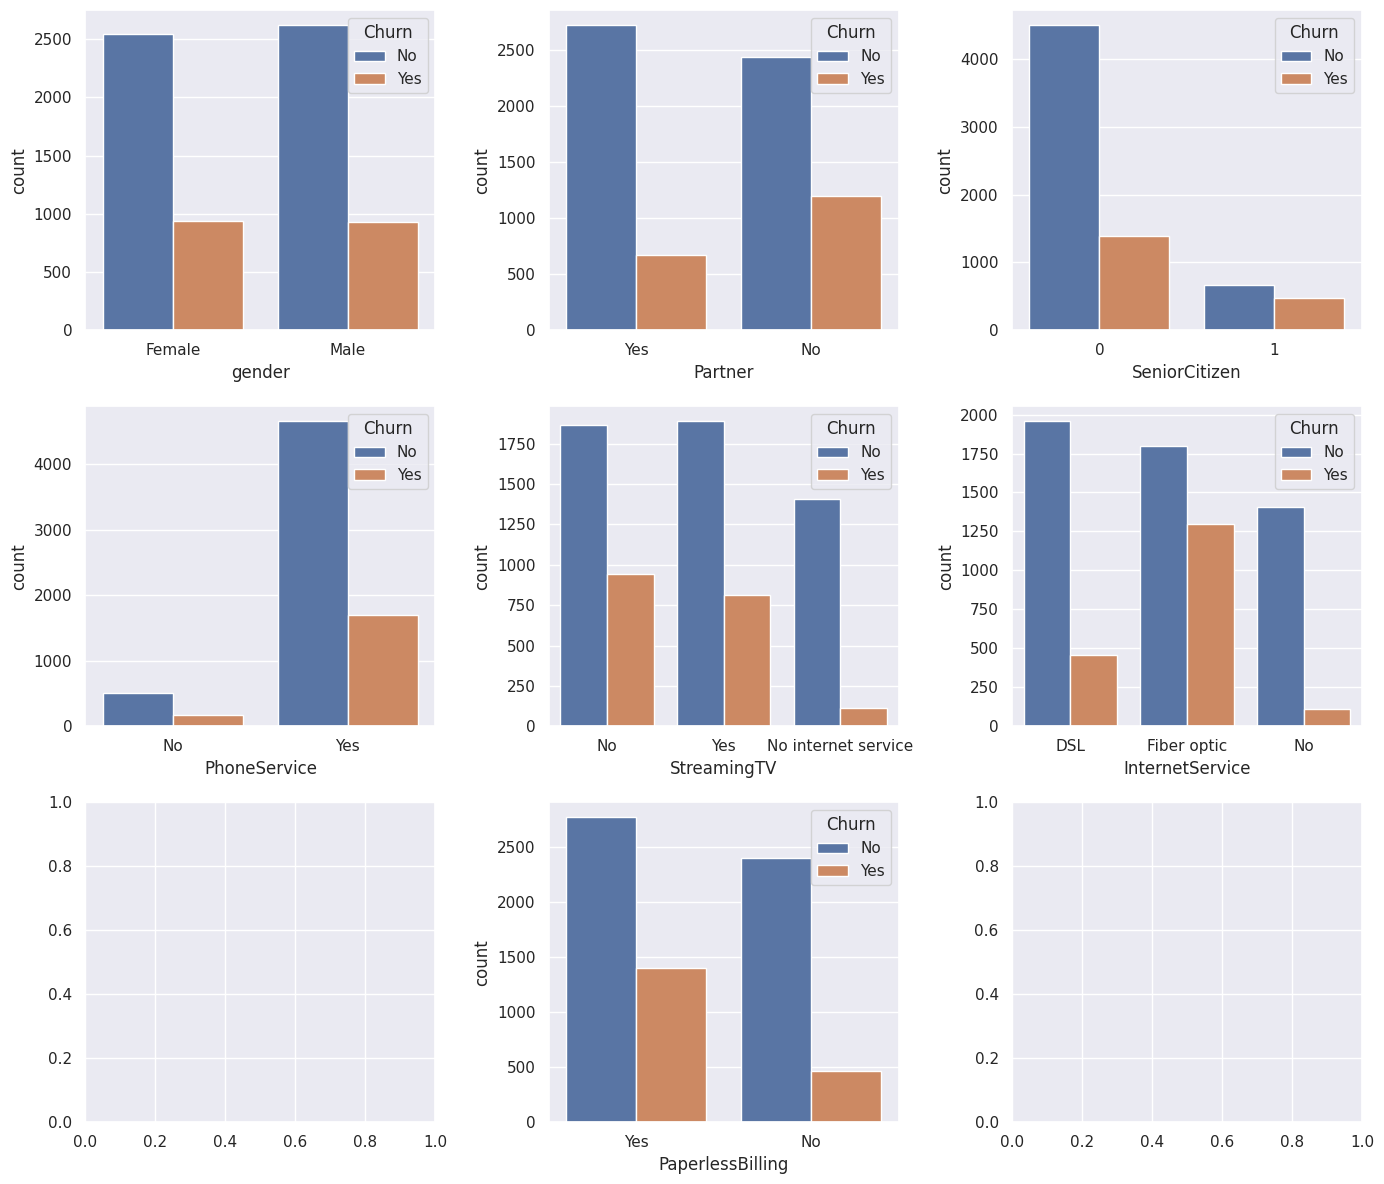

In [ ]:
# Exploratory Data Analysis (EDA) Variabel Kategorik

from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

In [ ]:
print(df_load.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
# Menghapus Unncecessary Columns dari data

cleaned_df = df_load.drop(columns=["customerID", "UpdatedAt"], errors='ignore')
print(cleaned_df.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [ ]:
# Encoding Data

from sklearn.preprocessing import LabelEncoder
import numpy as np

# Konversi semua kolom non-numerik menjadi numerik
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == 'object':
        cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())

            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7032.000000    7032.000000  7032.000000  7032.000000  7032.000000   
mean      0.504693       0.162400     0.482509     0.298493    32.421786   
std       0.500014       0.368844     0.499729     0.457629    24.545260   
min       0.000000       0.000000     0.000000     0.000000     1.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7032.000000    7032.000000      7032.000000     7032.000000   
mean       0.903299       0.940557         0.872582        0.789249   
std        0.295571       0.948627         0.737271        0.859962   
min        0.000000       0.000

In [ ]:
# Splitting Dataset

from sklearn.model_selection import train_test_split

# Predictor dan target
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']

# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.063, random_state=42)

# Print results
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape, ', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))

print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape, ', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (6588, 19) , sedangkan Jumlah baris dan kolom dari y_train adalah: (6588,)
Prosentase Churn di data Training adalah:
Churn
0    0.734821
1    0.265179
Name: proportion, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (444, 19) , sedangkan Jumlah baris dan kolom dari y_test adalah: (444,)
Prosentase Churn di data Testing adalah:
Churn
0    0.725225
1    0.274775
Name: proportion, dtype: float64


In [ ]:
# Pembuatan Model

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression().fit(x_train, y_train)
print('Model Logistic Regression yang terbentuk adalah: \n', log_model)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Performansi Model Training - Menampilkan Metrics

from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the training set
y_train_pred = log_model.predict(x_train)

# Classification report
print("Classification Report Training Model (Logistic Regression):\n")
print(classification_report(y_train, y_train_pred))

# Confusion matrix
print("Confusion Matrix Training Model (Logistic Regression):\n")
print(confusion_matrix(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression):

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4841
           1       0.65      0.56      0.60      1747

    accuracy                           0.80      6588
   macro avg       0.75      0.72      0.74      6588
weighted avg       0.80      0.80      0.80      6588

Confusion Matrix Training Model (Logistic Regression):

[[4323  518]
 [ 775  972]]
